In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [94]:
# build a citation graph

# add a node for each article, and an edge for each citation/reference paper 
# The graph will be directed graph. 
# If some paper cite the original paper, we regard the edge from new paper to the original paper.


# read the data
data = pd.read_csv('dblp_graph_conference.csv')

# create a graph
G = nx.DiGraph()

# add nodes (paper) and nodes attributes (paper_id,title,year,etc.)
citation = {}

data=data.drop_duplicates(subset=['references'])

existing_ids = set(data['id'])

for index, row in data.iterrows():
    article_id = row['id']
    title = row['title']
    year = row['year']
    reference_count = row['reference_count'] if not np.isnan(row['reference_count']) else 0
    references = row['references'].split(';') if pd.notnull(row['references']) else []
    
    G.add_node(article_id, title=title, year=year, reference_count=reference_count)
    #G.add_node(article_id, title=title, year=year)
    
    for ref_id in references:
        if ref_id not in G:
            G.add_node(ref_id, title='null', year='null',reference_count=-1)
        G.add_edge(article_id,ref_id)
    # for ref_id in references:
    #     if ref_id in existing_ids:
    #         G.add_edge(article_id,ref_id)
    
for node in G.nodes():
    G.nodes[node]['in_degree'] = G.in_degree(node)
    G.nodes[node]['out_degree'] = G.out_degree(node)


In [95]:
print("node number:", G.number_of_nodes())
print("edge number:", G.number_of_edges())

node number: 174711
edge number: 318789


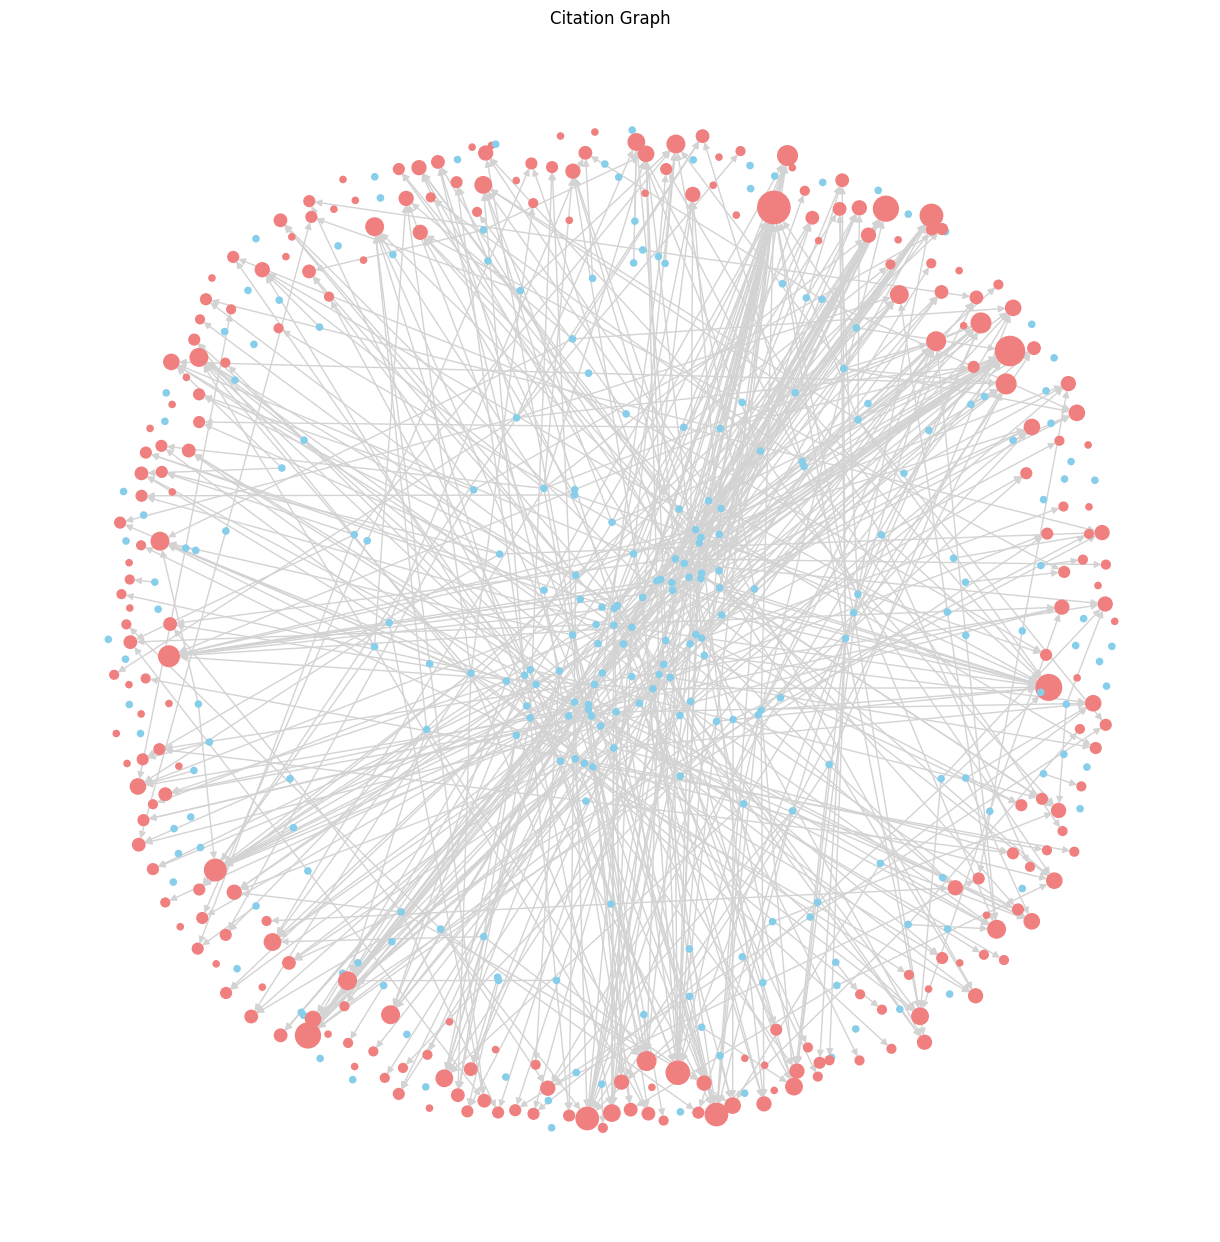

In [96]:
# To avoid a huge network, we filter the nodes and only show the nodes with top 500 degrees.
# the size of nodes are calculated by the numbers that they are cited(aka. in-degree)
# For the nodes, if they are from the keyword set, we color them as blue.
# If they not belong to our keyword set, we color them as red


selected = sorted(G.nodes, key=lambda x: G.degree(x), reverse=True)[:500]
selected_g = G.subgraph(selected)

node_sizes = [(selected_g.in_degree(paper)+1)*20 for paper in selected_g.nodes ]
node_colors = ['skyblue' if selected_g.nodes[paper]["title"] != 'null' else 'lightcoral' for paper in selected_g.nodes]
pos = nx.spring_layout(selected_g, seed=42) 

plt.figure(figsize=(12, 12))
nx.draw(
    selected_g, pos, 
    node_size=node_sizes, 
    node_color=node_colors, 
    with_labels=False, 
    edge_color='lightgray', 
    alpha=1
)
plt.title('Citation Graph')
plt.show()